In [4]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from sklearn.preprocessing import LabelEncoder


In [2]:
frame = pd.read_csv("../data/clear_data.scv")

In [9]:
frame_columns = frame.columns
print('Frame shape = ', frame.shape)

Frame shape =  (1117300, 12)


In [7]:
frame[frame['driver_id'].isna() == True].shape

(121509, 12)

## Data Preprocessing

In [14]:
# check columns for None values
column_none_dict = dict()

for column_name in tqdm(frame_columns):
    nones_column_shape = frame[frame[column_name].isna() == True].shape[0]
    column_none_dict[column_name] = nones_column_shape
    
print('Number of Nones values in columns:\n\n', column_none_dict)

100%|██████████| 12/12 [00:00<00:00, 38.63it/s]

Number of Nones values in columns:

 {'ride_id': 0, 'created_at': 0, 'pickup_lat': 0, 'pickup_lng': 0, 'dropoff_lat': 0, 'dropoff_lng': 0, 'user_id': 0, 'driver_id': 121509, 'ride_distance': 0, 'canceled_by_client': 0, 'canceled_by_driver': 0, 'ride_to_suburb': 0}


In [16]:
# select values whithout none for drive_id
clear_frame = frame[frame['driver_id'].isna() == False]

print('frame shape = ', frame.shape)
print('clear frame shape = ', clear_frame.shape)

frame shape =  (1117300, 12)
clear frame shape =  (995791, 12)


In [18]:
frame.head()

,ride_id,created_at,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,user_id,driver_id,ride_distance,canceled_by_client,canceled_by_driver,ride_to_suburb
0,000002b3a3014388a6c62fdda1d03de1n,2018-12-14 23:00:00.043000000,49.824671,24.013246,49.784729,24.060303,3900450045004500300042003700310037003800460031...,a429c637c1244bb7a1d606d2b9987bdd,7.97,0,0,0
1,000013de085e4be4a2cd27d9112f7bdbn,2018-10-13 23:59:00.580000000,49.837906,24.029772,49.841217,23.974363,6227785C7862375C7863623F5C7866652E285F2D5C7861...,NaN,5.62,1,0,0
2,000040911549444d8ad461c69370e883n,2018-08-25 21:40:52.537000000,49.839718,23.994425,49.840610,24.029135,62277C6C5C7866386C572C795C7838315C7831645C7863...,7323767ede0349d1a7bfe743a091d63c,3.17,0,0,0
3,0000759fc38a410e8d8802610800ccacn,2018-12-08 13:43:41.357000000,49.829708,24.044172,49.869137,24.010246,62275C7864335C78393135635C6E5C7830355C7839645C...,NaN,5.87,1,0,0
4,0000e61e5282484d943291df7266ee33n,2019-01-18 09:18:44.377000000,49.837013,24.034357,49.832710,23.999216,3300360037004600420041003600300032003500410033...,2913413c2bf748d7932d1d587c8aef13,3.39,0,0,0


In [19]:
# ID encoding

columns_id = ['ride_id']

for column_id in columns_id:
    le = LabelEncoder()
    
    frame[column_id] = le.fit_transform(frame[column_id])
    

In [22]:
frame_columns

Index(['ride_id', 'created_at', 'pickup_lat', 'pickup_lng', 'dropoff_lat',
       'dropoff_lng', 'user_id', 'driver_id', 'ride_distance',
       'canceled_by_client', 'canceled_by_driver', 'ride_to_suburb'],
      dtype='object')

In [6]:
def delete_nones(frame):
    # select values whithout none for drive_id
    clear_frame = frame[frame['driver_id'].isna() == False]

    print('frame shape = ', frame.shape)
    print('clear frame shape = ', clear_frame.shape)

    return clear_frame


def encode_ids(frame):
    # ID encoding

    columns_id = ['ride_id', 'user_id', 'driver_id']

    for column_id in columns_id:
        le = LabelEncoder()
        frame[column_id] = le.fit_transform(frame[column_id])

    return frame


In [7]:
# TODO: move into main
frame = delete_nones(frame)
frame = encode_ids(frame)

frame shape =  (1117300, 12)
clear frame shape =  (995791, 12)


/home/mak7/PycharmProjects/MURA/mur/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [15]:
# TODO: move into main
print('frame shape = ', frame.shape)
print('num unique drivers = ', np.array(frame.driver_id.unique()).shape[0])
print('num unique users = ', np.array(frame.user_id.unique()).shape[0])
print('num unique rides = ', np.array(frame.ride_id.unique()).shape[0])

frame shape =  (995791, 12)
num unique drivers =  4327
num unique users =  122713
num unique rides =  995791


### Zone discretizing

In [8]:
frame.head()

,ride_id,created_at,pickup_lat,pickup_lng,dropoff_lat,dropoff_lng,user_id,driver_id,ride_distance,canceled_by_client,canceled_by_driver,ride_to_suburb
0,0,2018-12-14 23:00:00.043000000,49.824671,24.013246,49.784729,24.060303,45133,2726,7.97,0,0,0
2,1,2018-08-25 21:40:52.537000000,49.839718,23.994425,49.840610,24.029135,122255,1942,3.17,0,0,0
4,2,2019-01-18 09:18:44.377000000,49.837013,24.034357,49.832710,23.999216,20280,665,3.39,0,0,0
5,3,2018-10-03 16:53:48.097000000,49.871124,23.957130,49.858883,24.019121,77669,1456,6.74,0,0,0
6,4,2019-01-25 06:25:31.730000000,49.785679,24.055679,49.842602,24.000990,57120,3846,13.16,0,0,0


In [18]:
frame.pickup_lat.min()

0.0

In [19]:
import matplotlib.pyplot as plt

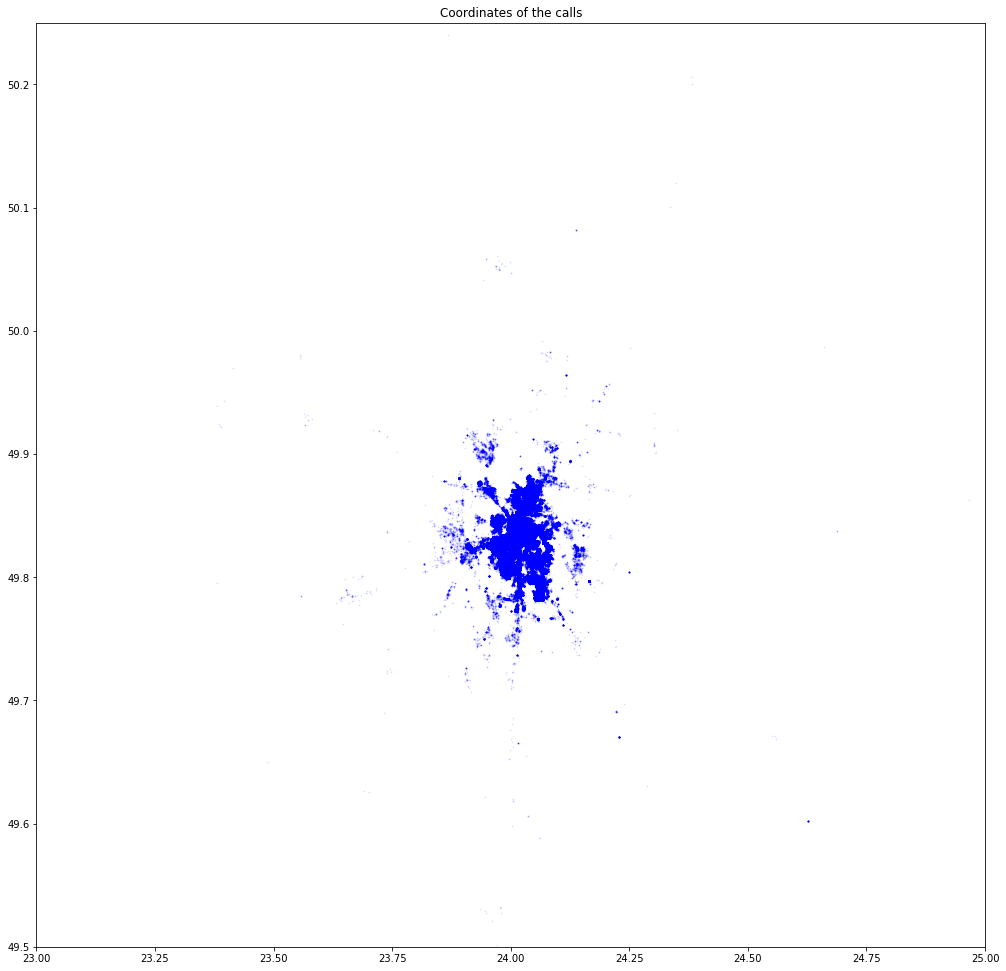

In [28]:
# city_long_border = (frame.pickup_lng.min(), frame.pickup_lng.max())
city_long_border = (23, 25)
# city_lat_border = (frame.pickup_lat.min(), frame.pickup_lat.max())
city_lat_border = (49.5, 50.25)

ax = plt.scatter(frame.pickup_lng.values, frame.pickup_lat.values,
              color='blue', s=0.5, label='train', alpha=0.1)
ax.axes.set_title('Coordinates of the calls')
ax.figure.set_size_inches(17,17)
plt.ylim(city_lat_border)
plt.xlim(city_long_border)
plt.show()